# Airbnb Rental Price Prediction - NYC

## Data Science Case Study

### Introduction
Airbnb is a global online marketplace that connects travelers with local hosts offering unique accommodations. Founded in 2008, it has revolutionized the hospitality industry by enabling individuals to monetize their living spaces. In New York City, one of Airbnb's largest markets, hosts face the critical challenge of setting competitive yet profitable rental prices amidst a dynamic market environment.


### Problem Statement
Using Machine Learning, predict the optimal Airbnb listing price in NYC given listing information (e.g., bedrooms, type of bed, location, ratings, etc.). This prediction model will help hosts maximize their rental income while maintaining competitive pricing in the market.

### Objective
To develop a machine learning model that can accurately predict Airbnb listing prices in NYC based on various features, helping hosts optimize their rental pricing strategy. The model will analyze multiple factors including property characteristics, location data, and historical review scores to provide data-driven pricing recommendations.

### Data Description
The dataset contains detailed information about Airbnb listings in NYC with 23 features:
Host Information:

- host_id: Unique identifier for each host
- host_name: Name of the host

Location Details:

- city: City location (NYC)
- state: State location
- zipcode: Local postal code
- country: Country location (USA)
- latitude: Geographic latitude
- longitude: Geographic longitude

Property Characteristics:

- property_type: Classification of property (e.g., apartment, house)
- room_type: Type of room offered
- accommodates: Maximum number of guests allowed
- bathrooms: Number of bathrooms
- bedrooms: Number of bedrooms
- beds: Number of beds available
- bed_type: Type of bed provided
- square_feet: Property size in square feet

Pricing and Availability:

- price: Rental price per night (target variable)
- availability_365: Number of days available in a year

Review Metrics:

- number_of_reviews: Total review count
- review_scores_rating: Overall rating score
- review_scores_cleanliness: Cleanliness rating
- review_scores_location: Location rating
- review_scores_value: Value for money rating

# Libraries and Setup

In [3]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import datetime as dt

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Model evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

# Display settings
from IPython.display import Markdown, display

# Warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Exploratory Data Analysis

### 1.1 Data Loading and Initial Inspection

In [4]:
# Load the dataset
airbnb_data = pd.read_csv('airbnb_listings.csv')

In [5]:
airbnb_data.head()

,host_id,host_name,city,state,zipcode,country,latitude,longitude,property_type,room_type,...,beds,bed_type,square_feet,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value
0,5867023,Michael,New York,NY,10022-4175,United States,40.756852,-73.964754,Apartment,Entire home/apt,...,1.0,Real Bed,NaN,$160.00,322,62,86.0,7.0,10.0,9.0
1,2631556,Denise,New York,NY,NaN,United States,40.830599,-73.941014,Apartment,Entire home/apt,...,3.0,Real Bed,NaN,$105.00,348,22,85.0,8.0,7.0,8.0
2,4601412,Miao,Brooklyn,NY,11221,United States,40.692189,-73.924120,Apartment,Private room,...,2.0,Real Bed,NaN,$58.00,227,35,98.0,10.0,9.0,10.0
3,198425,Sara,New York,NY,10011,United States,40.734751,-74.002592,Apartment,Entire home/apt,...,1.0,Real Bed,NaN,$185.00,274,26,96.0,9.0,10.0,9.0
4,22590025,Charles,New York,NY,10011,United States,40.745282,-73.997836,Apartment,Entire home/apt,...,2.0,Real Bed,NaN,$195.00,365,1,100.0,10.0,10.0,10.0


In [6]:
# Display basic information about the dataset
print("Dataset Shape:", airbnb_data.shape)
print("\nDataset Info:")
airbnb_data.info()

Dataset Shape: (27392, 23)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27392 entries, 0 to 27391
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_id                    27392 non-null  int64  
 1   host_name                  27392 non-null  object 
 2   city                       27392 non-null  object 
 3   state                      27390 non-null  object 
 4   zipcode                    27230 non-null  object 
 5   country                    27391 non-null  object 
 6   latitude                   27392 non-null  float64
 7   longitude                  27392 non-null  float64
 8   property_type              27386 non-null  object 
 9   room_type                  27392 non-null  object 
 10  accommodates               27392 non-null  int64  
 11  bathrooms                  26929 non-null  float64
 12  bedrooms                   27252 non-null  float64
 13  beds

### 1.2 Statistical Summary

In [7]:
# Display statistical summary of numerical columns
airbnb_data.describe()

,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value
count,2.739200e+04,27392.000000,27392.000000,27392.000000,26929.000000,27252.000000,27294.000000,1006.000000,27392.000000,27392.000000,18735.000000,18661.000000,18660.000000,18658.000000
mean,8.518927e+06,40.733070,-73.964276,2.892779,1.116287,1.135660,1.531289,720.210736,262.919210,10.130221,92.218895,9.011093,9.248660,9.125737
std,7.510027e+06,0.048968,0.035162,1.755137,0.369832,0.667599,1.098971,652.795558,125.668249,18.665400,8.336264,1.163870,0.973474,0.906612
min,2.830000e+02,40.509611,-74.239539,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000
25%,2.104498e+06,40.699655,-73.988449,2.000000,1.000000,1.000000,1.000000,371.250000,177.000000,0.000000,89.000000,8.000000,9.000000,9.000000
50%,6.119374e+06,40.728024,-73.966075,2.000000,1.000000,1.000000,1.000000,650.000000,333.000000,3.000000,94.000000,9.000000,10.000000,9.000000
75%,1.392422e+07,40.764030,-73.947260,4.000000,1.000000,1.000000,2.000000,913.250000,363.000000,11.000000,99.000000,10.000000,10.000000,10.000000
max,2.546867e+07,40.907704,-73.726710,16.000000,8.000000,10.000000,16.000000,12000.000000,365.000000,221.000000,100.000000,10.000000,10.000000,10.000000


### 1.3 Missing Value Analysis

Missing Values in Each Column:
                           Missing Values  Percentage
state                                   2    0.007301
zipcode                               162    0.591414
country                                 1    0.003651
property_type                           6    0.021904
bathrooms                             463    1.690275
bedrooms                              140    0.511098
beds                                   98    0.357769
square_feet                         26386   96.327395
review_scores_rating                 8657   31.604118
review_scores_cleanliness            8731   31.874270
review_scores_location               8732   31.877921
review_scores_value                  8734   31.885222



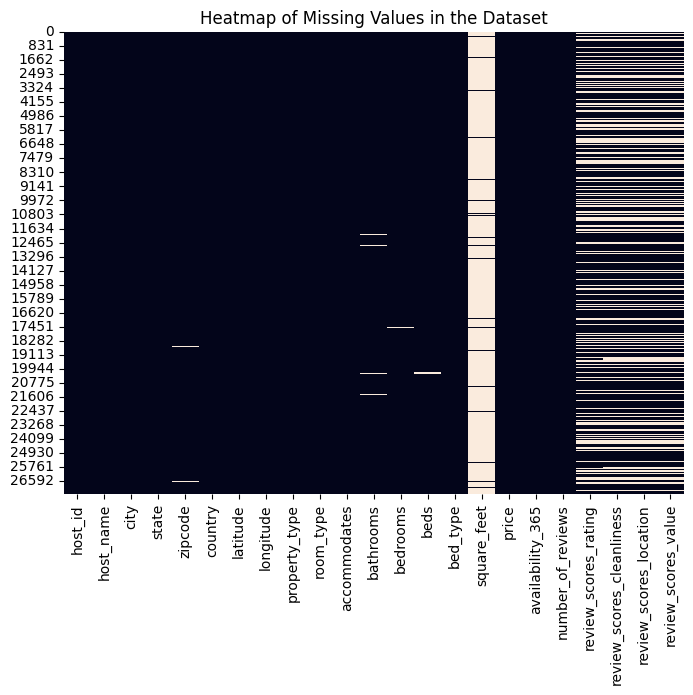

In [8]:
# Check for missing values in each column
print("Missing Values in Each Column:")
missing_values = airbnb_data.isna().sum()
missing_percentage = (airbnb_data.isna().sum() / len(airbnb_data)) * 100
missing_data = pd.concat([missing_values, missing_percentage], axis=1)
missing_data.columns = ['Missing Values', 'Percentage']
print(missing_data[missing_data['Missing Values'] > 0])
print()

# Visualize missing values using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(airbnb_data.isnull(), cbar=False, cmap='rocket')
plt.title('Heatmap of Missing Values in the Dataset')
plt.show()

Key Observations from Missing Value Analysis:
- square_feet has the highest number of missing values (26,386 entries, 96.3%)
- Review-related columns have around 8,700 missing values (31.8%)
- bathrooms, bedrooms, and beds have relatively few missing values (<2%)
- Missing value treatment will be performed in the Data Preprocessing section

### 1.4 Duplicate Check

In [7]:
# Check for duplicate values
duplicate_count = airbnb_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


### 1.5 Feature Overview

In [8]:
# Identify numeric and categorical columns
numeric_cols = airbnb_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = airbnb_data.select_dtypes(include=['object']).columns

# Display unique values in each column
unique_values = {col: airbnb_data[col].nunique() for col in airbnb_data.columns}

for col, values in unique_values.items():
    print(f"Unique values in column '{col}': {values}")

Unique values in column 'host_id': 22342
Unique values in column 'host_name': 7381
Unique values in column 'city': 161
Unique values in column 'state': 4
Unique values in column 'zipcode': 185
Unique values in column 'country': 1
Unique values in column 'latitude': 27373
Unique values in column 'longitude': 27357
Unique values in column 'property_type': 18
Unique values in column 'room_type': 3
Unique values in column 'accommodates': 16
Unique values in column 'bathrooms': 15
Unique values in column 'bedrooms': 11
Unique values in column 'beds': 15
Unique values in column 'bed_type': 5
Unique values in column 'square_feet': 182
Unique values in column 'price': 452
Unique values in column 'availability_365': 366
Unique values in column 'number_of_reviews': 171
Unique values in column 'review_scores_rating': 56
Unique values in column 'review_scores_cleanliness': 9
Unique values in column 'review_scores_location': 8
Unique values in column 'review_scores_value': 9


### 1.6 Correlation Analysis

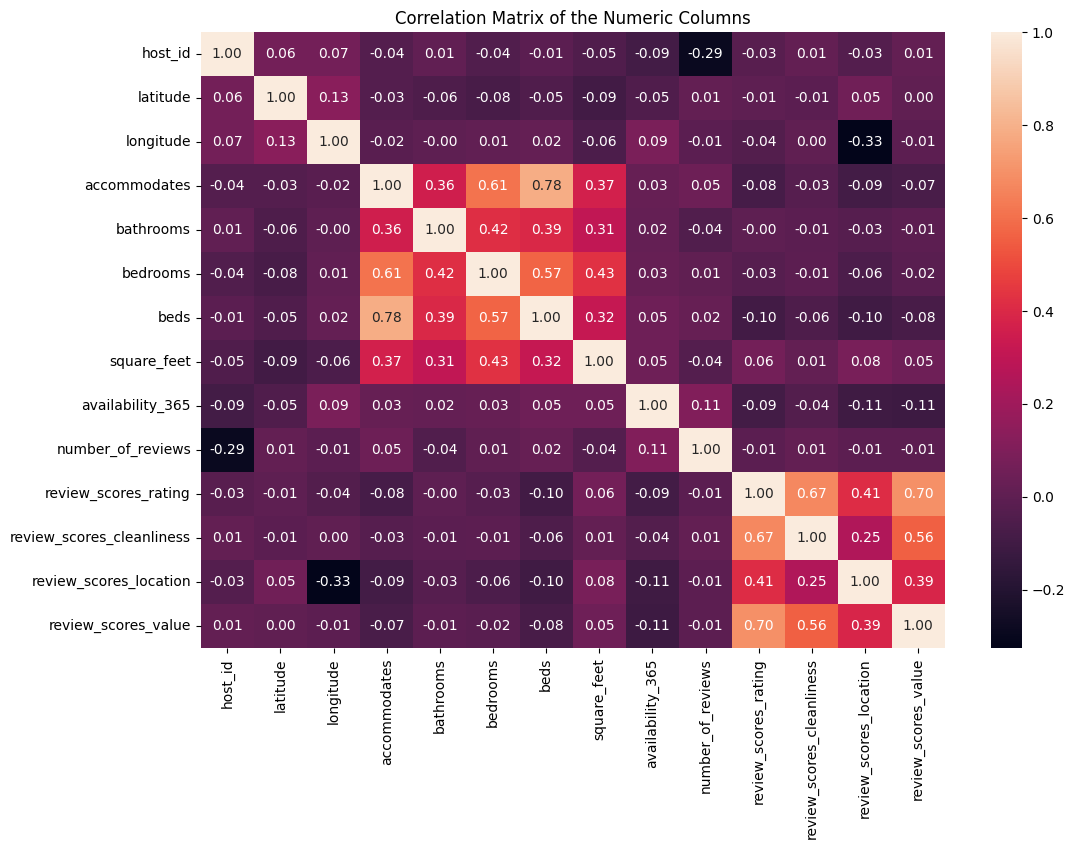

In [9]:
# Analyze relationships between numerical variables to identify potential predictors
# Note: Strong correlations between features might indicate multicollinearity

num_cols = airbnb_data.select_dtypes(include = ['float64', 'int64'])
correlation_matrix = num_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='rocket')
plt.title('Correlation Matrix of the Numeric Columns')
plt.savefig("Correlation Matrix of the Numeric Columns.png")
plt.show()

### 1.7 Univariate Analysis

#### 1.7.1 Distribution of Numerical Features

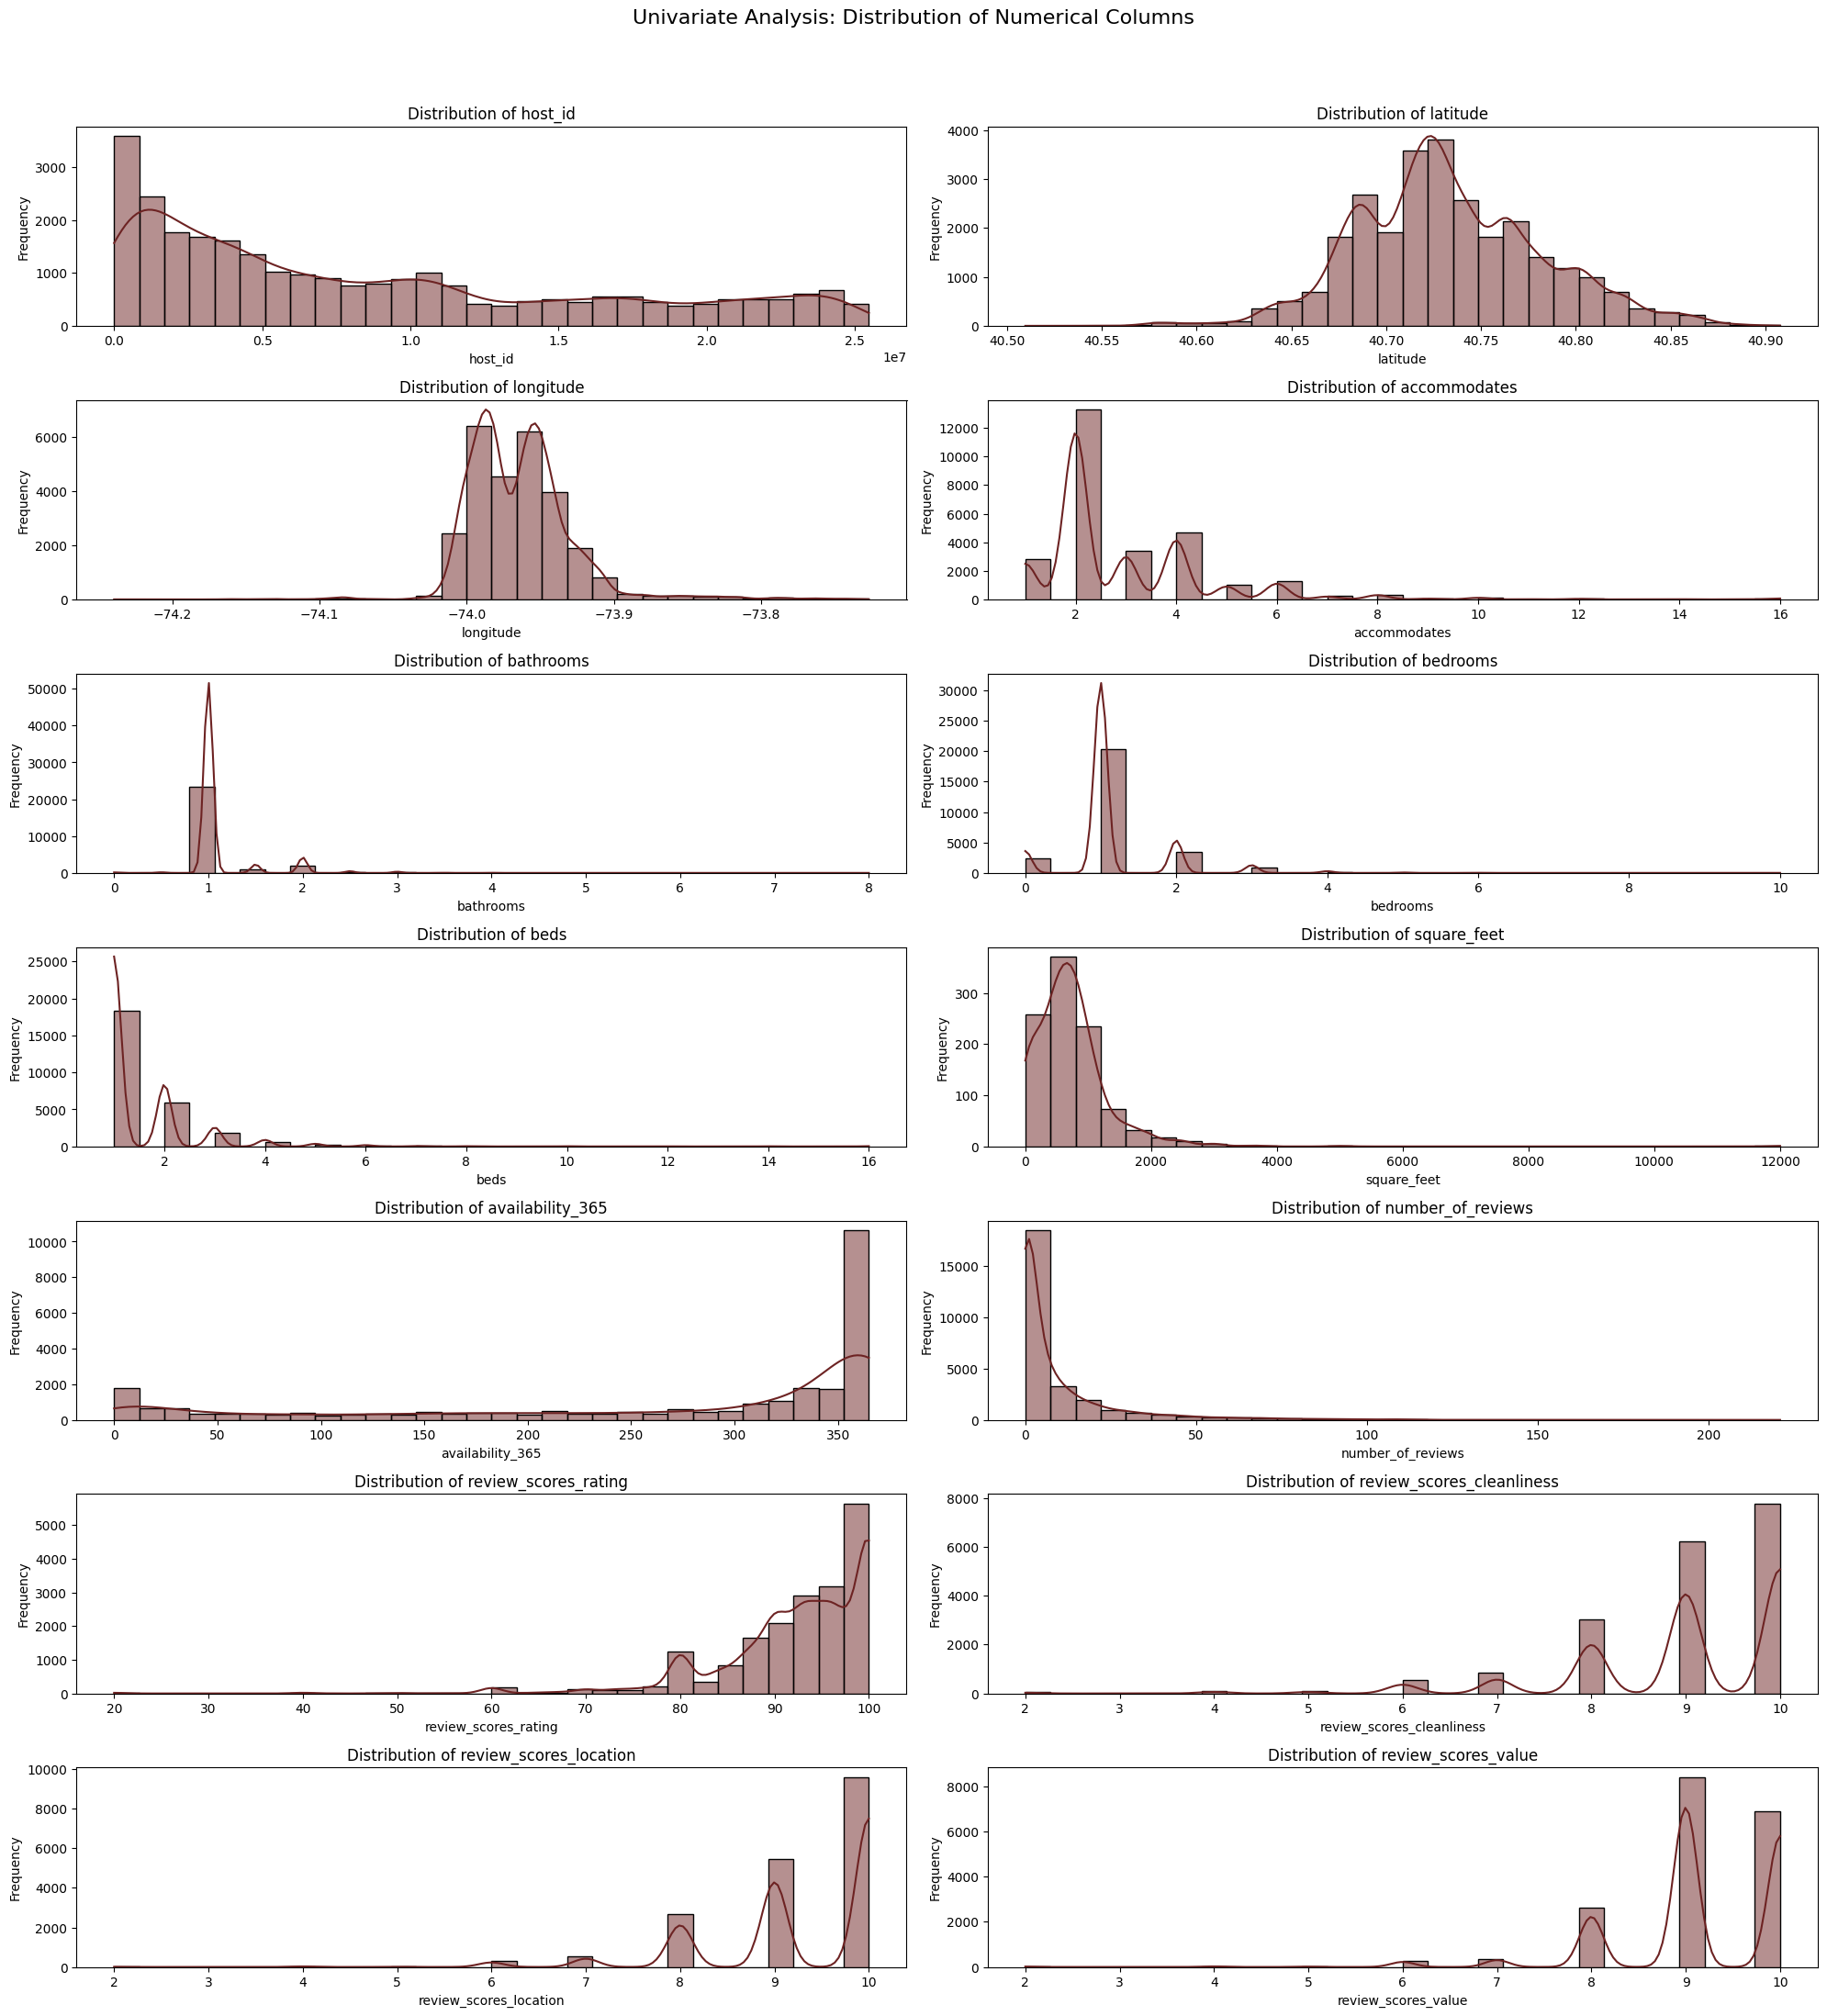

In [10]:
# Examine the distribution of each numerical variable to identify patterns and outliers
# This helps in understanding the need for transformations or outlier treatment

# Plotting histograms for numerical columns
numeric_cols = airbnb_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 28))
plt.suptitle('Univariate Analysis: Distribution of Numerical Columns', fontsize=16)

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(9, 2, i)
    sns.histplot(airbnb_data[col], kde=True, bins=30, color='#6D2323')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
plt.savefig("Distribution of Numerical Columns.png")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The distribution plots for numerical variables reveal several key insights:

1. `Distribution of host_id`: Shows a right-skewed distribution with many unique hosts having fewer listings and a few hosts with multiple properties.

2. `latitude/longitude`: Shows a concentrated distribution around NYC coordinates, with latitude centered around 40.75 and longitude around -74.0, indicating most listings are in core NYC areas.

3. `accommodates/bathrooms/bedrooms/beds`: These show right-skewed distributions:

- Most properties accommodate 2-4 people
- Majority have 1-2 bedrooms
- Most common are 1-bathroom units
- Bed counts typically range from 1-3

4. `square_feet`: Limited data available, showing high variability

5. `availability_365`: Shows a bimodal distribution, suggesting two main hosting patterns - occasional hosts and full-time rentals.

6. `review scores`: All review-related metrics show left-skewed distributions, indicating generally positive reviews with scores clustered at the higher end.


#### 1.7.2 Distribution and Outliers of Key Numerical Features

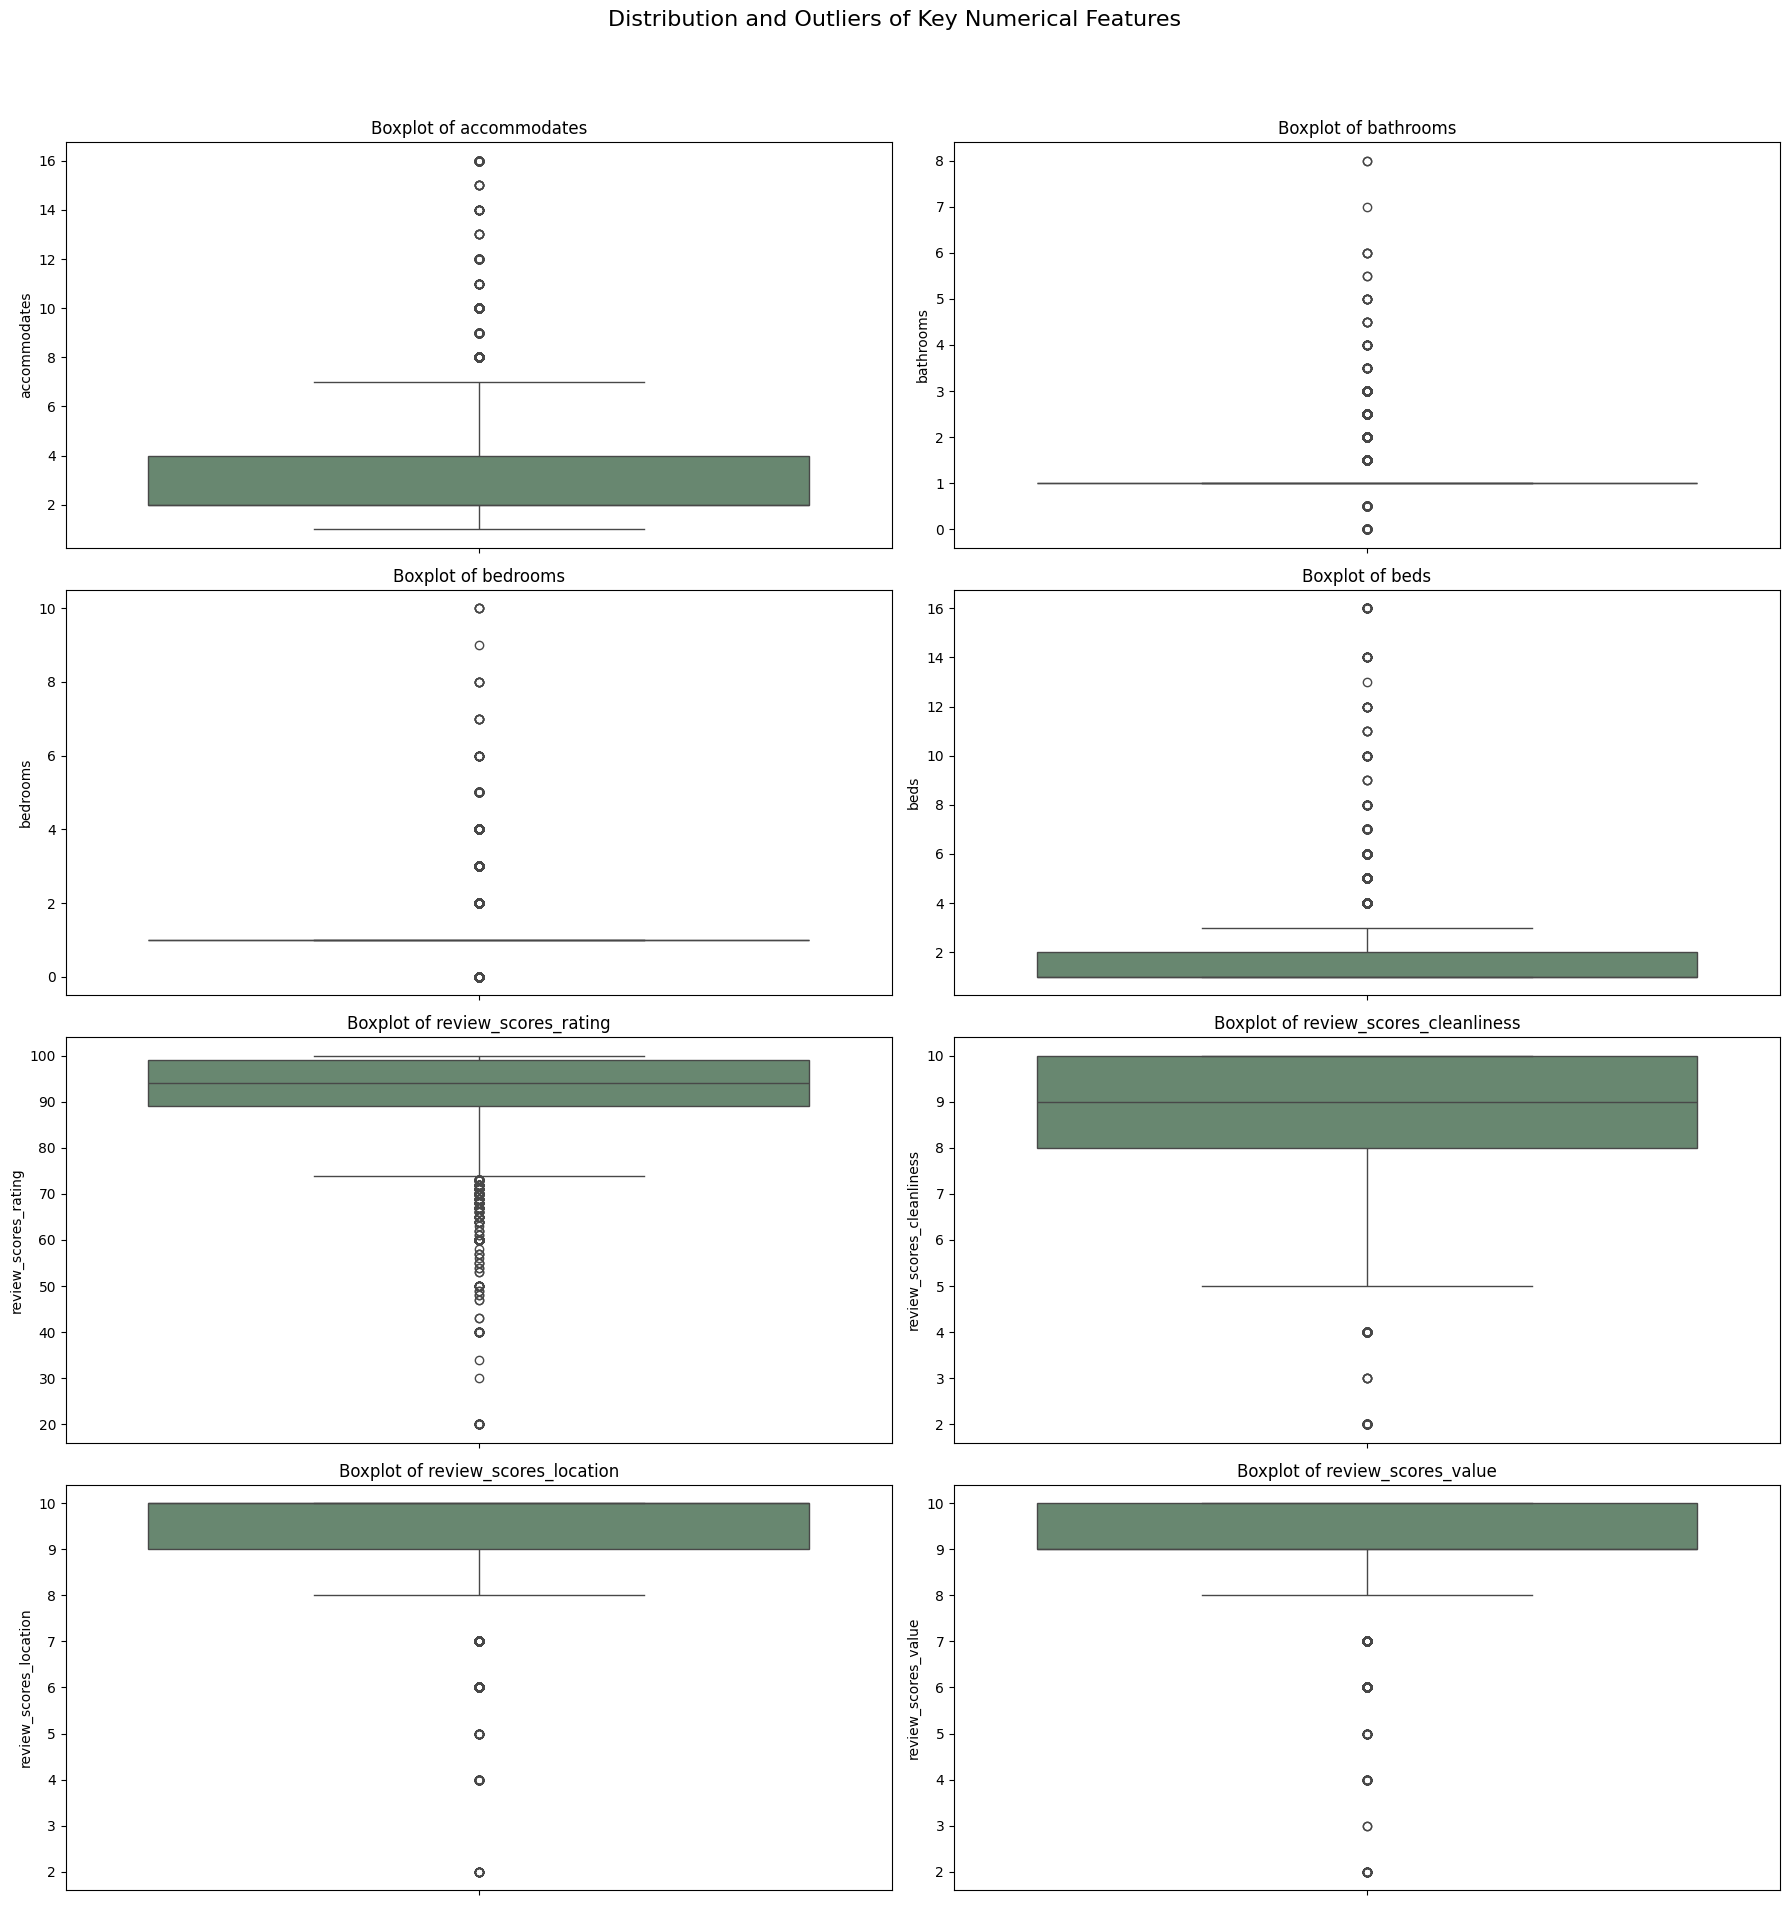

In [11]:
# Box Plots for Numerical Variables
plt.figure(figsize=(18, 20))
plt.suptitle('Distribution and Outliers of Key Numerical Features', fontsize=16)
numerical_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 
                     'review_scores_rating', 'review_scores_cleanliness',
                     'review_scores_location', 'review_scores_value']

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(y=airbnb_data[feature], color='#638C6D')
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
    
plt.savefig("Distribution and Outliers of Key Numerical Features.png")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Property Features Distribution(Boxplots)

- `Accommodates`: Median is around 2-4 guests, with outliers extending up to 16 guests. This suggests most listings are for small groups/families.
- `Bathrooms`: Most properties have 1-2 bathrooms, with outliers up to 8 bathrooms. The distribution is right-skewed.
- `Bedrooms`: Predominantly 1-2 bedroom properties, with some outliers having up to 10 bedrooms.
- `Beds`: Similar to bedrooms, majority have 1-2 beds, with outliers reaching 16 beds.

Review Scores Distribution

- `Overall Rating`: Strong left skew with median around 90-95, indicating generally positive reviews.
- `Cleanliness`: Very high median (around 9), with few low outliers below 5.
- `Location`: Consistently high scores (median ~9.5) with minimal variation.
- `Value`: Similar pattern to other review metrics, suggesting overall guest satisfaction.

#### 1.7.3 Property Types Analysis

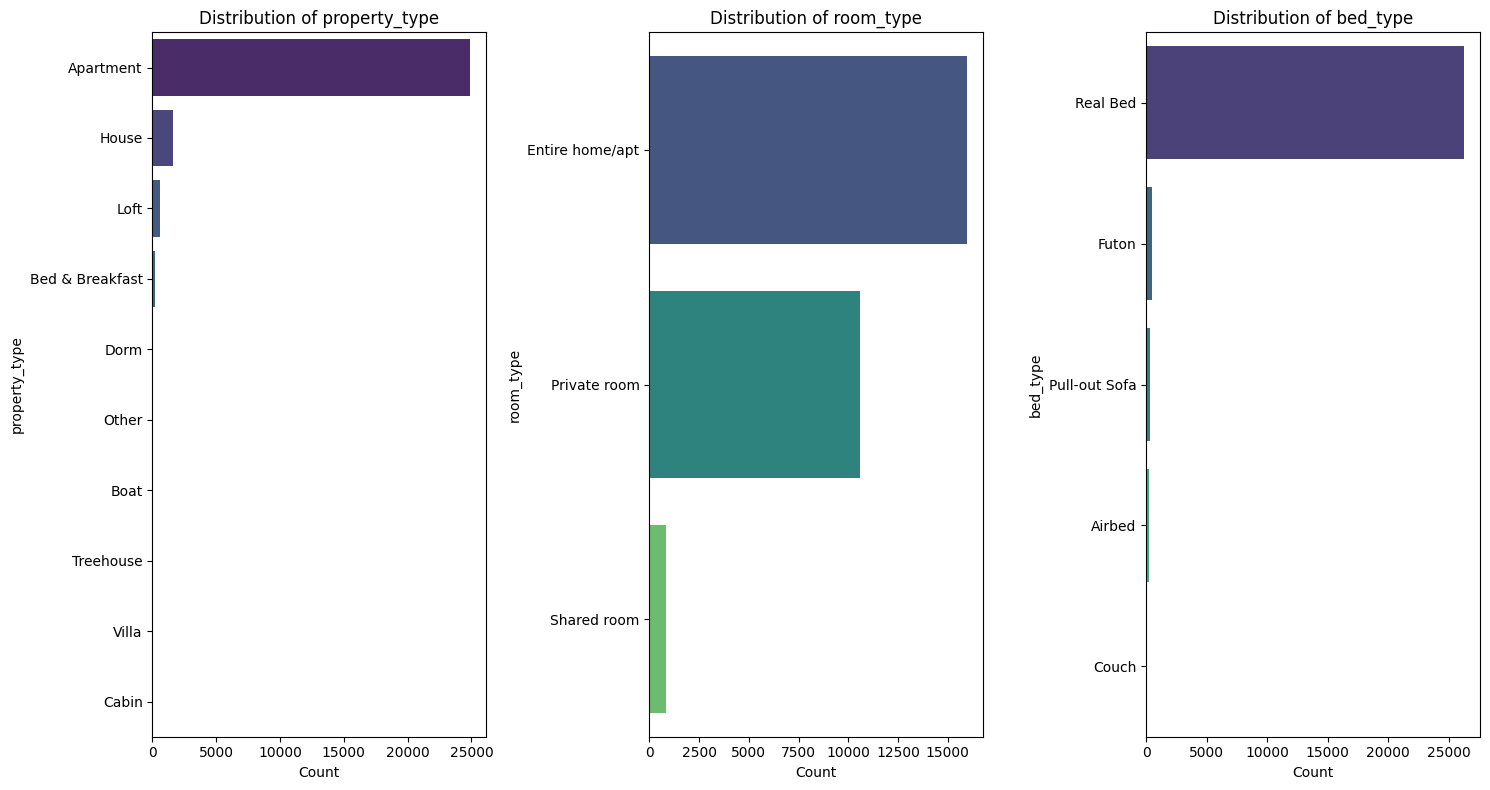

In [12]:
# Categorical Features Distribution
plt.figure(figsize=(15, 8))
categorical_features = ['property_type', 'room_type', 'bed_type']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    top_categories = airbnb_data[feature].value_counts().head(10)
    sns.barplot(x=top_categories.values, y=top_categories.index, palette = 'viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')

plt.savefig("Distribution of Categorical Features.png")
plt.tight_layout()

Property Types:

- Apartments dominate the market (~25,000 listings)
- Houses are distant second (~2,500 listings)
- Other types (lofts, B&Bs, boats) are relatively rare


Room Types:

- "Entire home/apt" is most common
- "Private room" represents significant portion
- "Shared room" is least common


Bed Types:

- Real beds overwhelmingly dominant
- Other options (futons, pull-out sofas) are minimal

#### 1.7.4 Review Scores Density Distribution

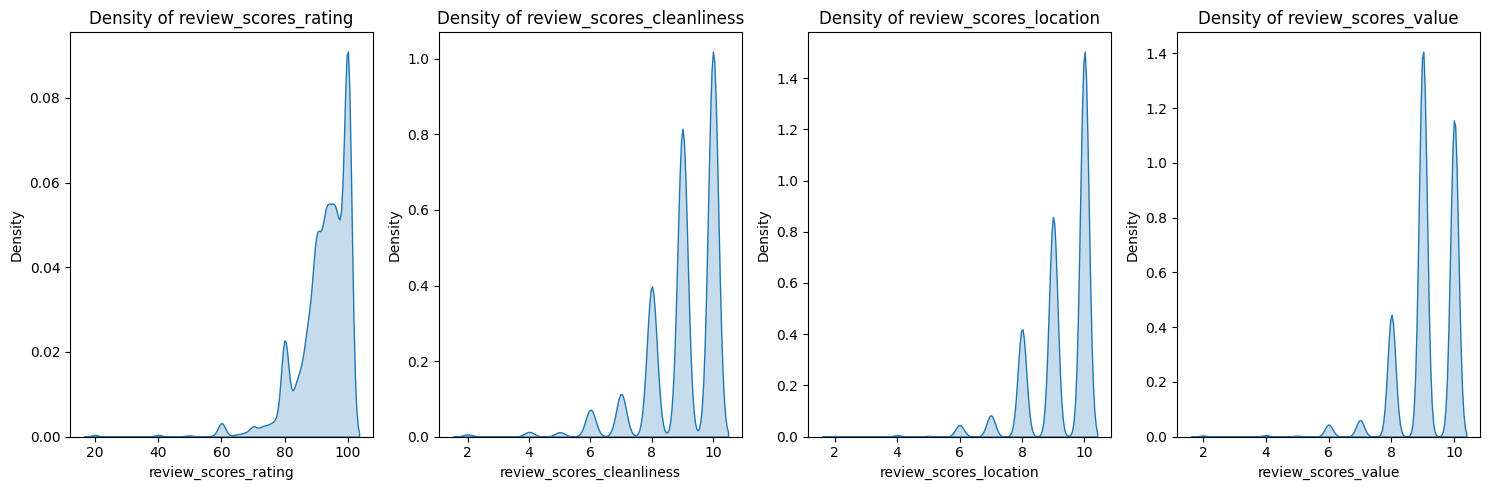

In [13]:
# KDE Plots for Review Scores
plt.figure(figsize=(15, 5))
review_scores = ['review_scores_rating', 'review_scores_cleanliness',
                'review_scores_location', 'review_scores_value']

for i, score in enumerate(review_scores, 1):
    plt.subplot(1, 4, i)
    sns.kdeplot(data=airbnb_data[score], fill=True, palette = 'viridis')
    plt.title(f'Density of {score}')
    plt.xlabel(score)
    
plt.savefig("KDE Plots for Review Scores.png")
plt.tight_layout()

1. Overall Rating (review_scores_rating):

- Strong positive skew with majority of ratings between 80-100
- Highest density peak around 95
- Secondary peak around 85
- Very few ratings below 60
- Suggests generally high guest satisfaction and possible rating inflation


2. Cleanliness Scores:

- Multiple distinct peaks at 8, 9, and 10
- Highest density at score 10
- Sharp decline below score 7
- Very few properties rated below 5
- Indicates hosts maintain high cleaning standards


3. Location Scores:

- Similar multi-modal pattern
- Major peaks at 9 and 10
- Secondary peaks at 7 and 8
- Almost no scores below 6
- Reflects prime NYC locations and good accessibility


4. Value Scores:

- Three distinct peaks at 8, 9, and 10
- Highest density at score 9
- Notable secondary peak at score 10
- Few ratings below 7
- Suggests guests find good price-to-quality ratio

#### 1.7.5 Geographic Distribution

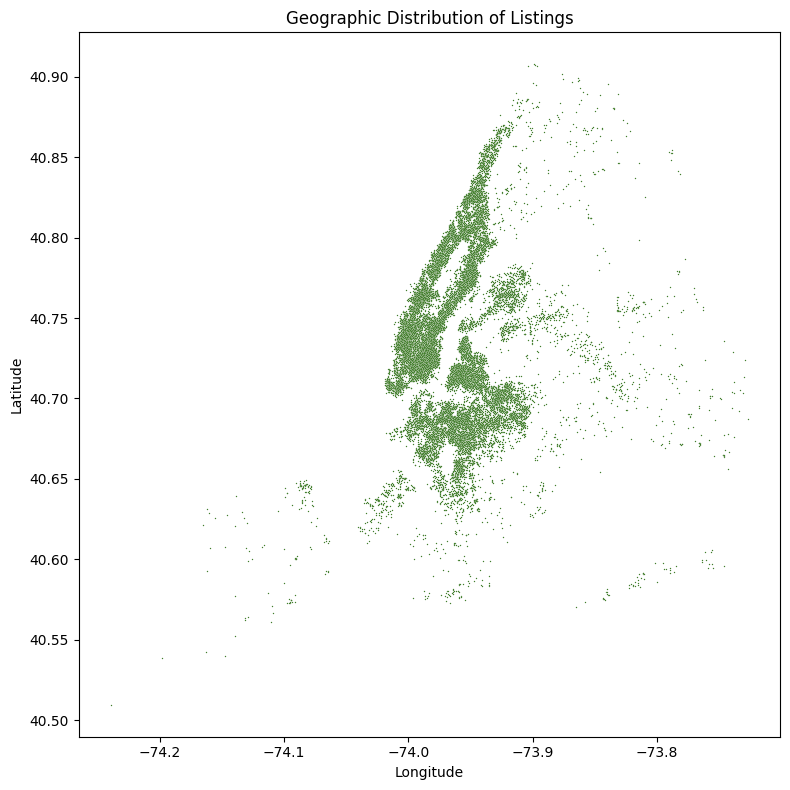

In [14]:
# Geographic Distribution
plt.figure(figsize=(8, 8))
sns.scatterplot(x = 'longitude', y = 'latitude', data = airbnb_data, c='#3E7B27', s=1)
plt.title('Geographic Distribution of Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig("Geographic Distribution of Listings.png")
plt.tight_layout()

- Clear concentration in Manhattan area (around -74.0, 40.75)
- Secondary clusters likely in Brooklyn and Queens
- Fewer listings in outer boroughs
- Pattern follows NYC's population density and tourist demand

### 1.8 Bivariate Analysis

#### 1.8.1 Price Preprocessing and Binning

In [15]:
airbnb_data['price'] = airbnb_data['price'].str.replace('$', '').str.replace(',', '').astype(float)
airbnb_data['price']

bins = [0, 50, 100, 200, 500, 1000, 5000]  # Define price ranges
labels = ['0-50', '51-100', '101-200', '201-500', '501-1000', '1001+']
airbnb_data['price_range'] = pd.cut(airbnb_data['price'], bins=bins, labels=labels)

The `price` column in the dataset contains dollar signs (`$`) and commas, making it a non-numeric column. Since `price` is a key variable for analysis, it was preprocessed to remove these characters and converted into a numeric format.

Additionally, the continuous `price` variable was grouped into categorical bins to simplify analysis and visualize the distribution of price ranges across different states. The following steps were taken:

1. Removed dollar signs and commas.
2. Converted the `price` column to numeric format.
3. Defined price ranges using bins:
   - **0-50**
   - **51-100**
   - **101-200**
   - **201-500**
   - **501-1000**
   - **1001+**
4. Created a new column called `price_range` with the corresponding labels for each bin.


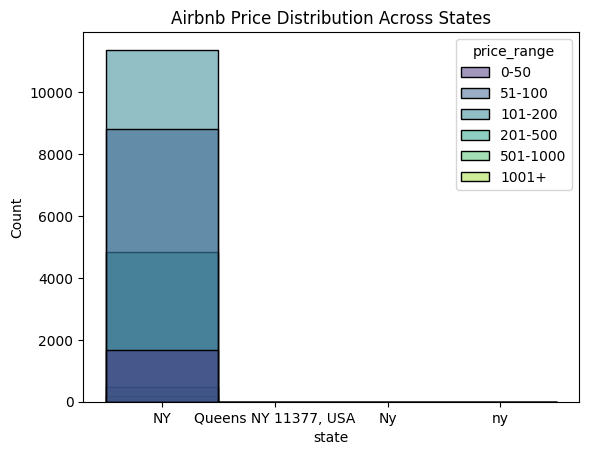

In [16]:
sns.histplot(x='state', hue='price_range', data=airbnb_data, palette = 'viridis')
plt.title('Airbnb Price Distribution Across States')
plt.savefig("state vs price_countplot.png")
plt.show()

Most listings belong to New York (NY), as indicated by the tall bar, with varying price ranges from `$0 to $1000+`.

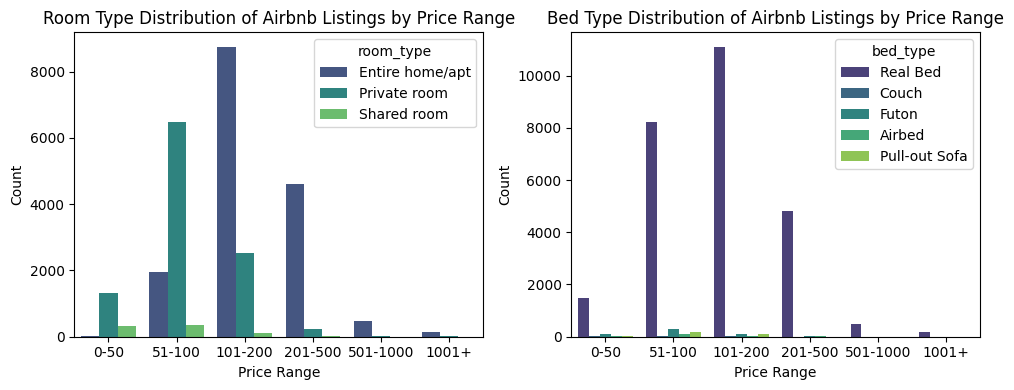

In [17]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='price_range', hue='room_type', data=airbnb_data, palette='viridis')
plt.title("Room Type Distribution of Airbnb Listings by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.countplot(x='price_range', hue='bed_type', data=airbnb_data, palette='viridis')
plt.title("Bed Type Distribution of Airbnb Listings by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

**Insights**:

1. Room Types:

- Entire homes/apartments dominate in the 101–200 price range.
- Private rooms are common in the 51–100 range, while shared rooms are mostly in the 0–50 range.

2. Bed Types:

- Real Beds dominate across all price ranges, especially 101–200 and higher.
- Budget options like Couch, Futon, and Airbed are common in 0–50 and 51–100 ranges.

**Key Insight**: Mid-range prices dominate the Airbnb market, with budget and luxury options serving smaller segments.

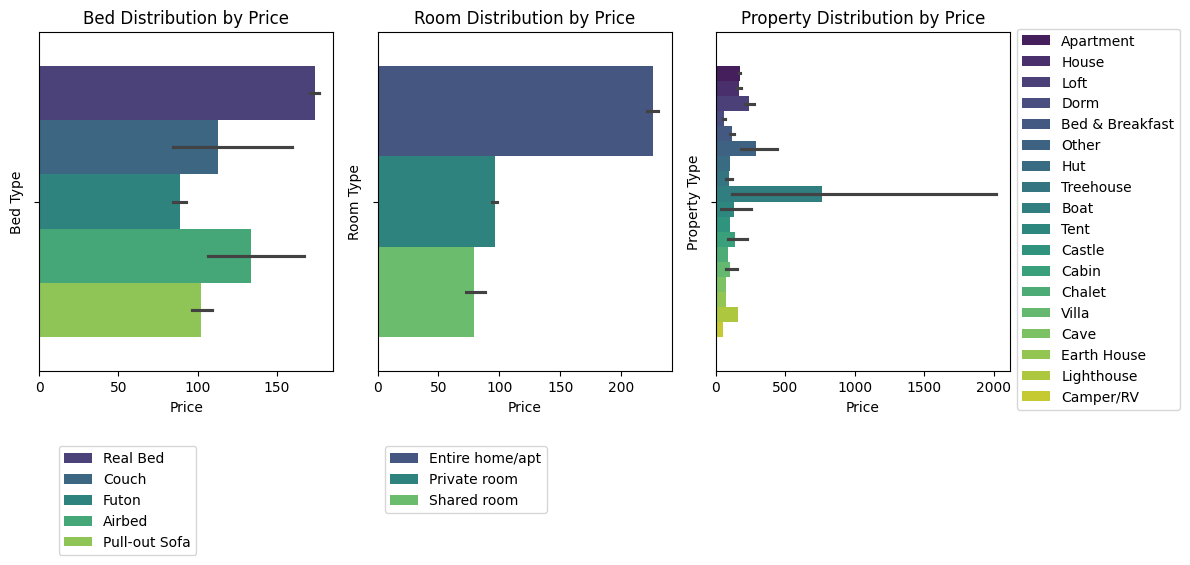

In [18]:
plt.figure(figsize=(12, 6))

# First subplot
plt.subplot(1, 3, 1)
sns.barplot(x='price', hue='bed_type', data=airbnb_data, palette='viridis')
plt.title("Bed Distribution by Price")
plt.xlabel("Price")
plt.ylabel("Bed Type")
plt.legend(loc='upper center', bbox_to_anchor=(0.3, -0.2), ncol=1)

# Second subplot
plt.subplot(1, 3, 2)
sns.barplot(x='price', hue='room_type', data=airbnb_data, palette='viridis')
plt.title("Room Distribution by Price")
plt.xlabel("Price")
plt.ylabel("Room Type")
plt.legend(loc='upper center', bbox_to_anchor=(0.3, -0.2))

# Third subplot (index from 1 to 3)

plt.subplot(1, 3, 3)
sns.barplot(x='price', hue='property_type', data=airbnb_data, palette='viridis')
plt.title("Property Distribution by Price")
plt.xlabel("Price")
plt.ylabel("Property Type")
plt.legend(bbox_to_anchor=(1.0, 1.03))

plt.tight_layout()
plt.show()

1. Bed Type Distribution:

- Real Beds are associated with higher prices, indicating they are preferred for premium listings.
- Airbeds, Futons, and Pull-out Sofas are typically in the lower price range, suggesting they cater to budget-friendly listings.

2. Room Type Distribution:

- Entire homes/apartments dominate the higher price range, as they offer privacy and exclusivity.
- Private rooms are moderately priced and seem to be common in mid-range listings.
- Shared rooms fall in the lowest price range, catering to budget-conscious travelers.

3. Property Type Distribution:

- Apartments and houses are the most common property types across all price ranges, with a broad spectrum of pricing.
- Unique property types like Treehouses, Lighthouses, and Villas are fewer in number but skew towards higher price ranges, suggesting they cater to niche, high-end travelers.

**Overall Insight**:

- Traditional accommodations like Real Beds in private or entire spaces dominate, reflecting customer preferences for comfort and privacy.
- Budget options like shared rooms and unconventional properties attract specific segments, while premium and unique properties stand out in higher price brackets.

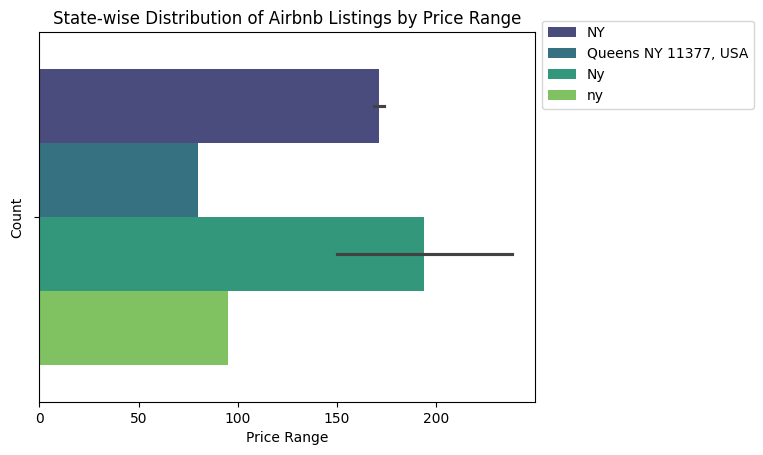

In [19]:
sns.barplot(x='price', hue='state', data=airbnb_data, palette='viridis')
plt.title("State-wise Distribution of Airbnb Listings by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.0, 1.05))
plt.show()

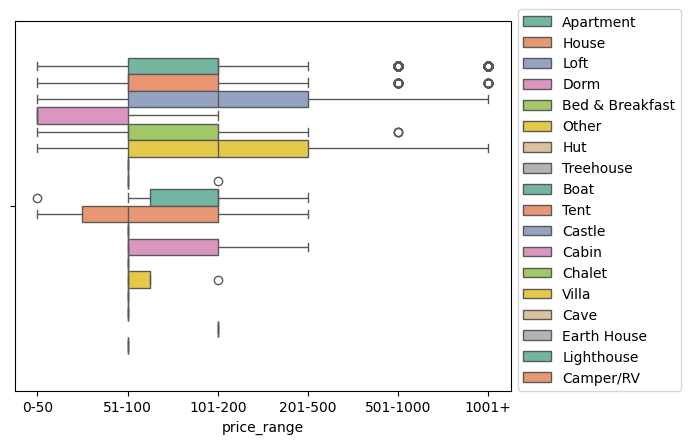

In [20]:
sns.boxplot(x = 'price_range', hue = 'property_type', data = airbnb_data, palette = 'Set2')
plt.legend(bbox_to_anchor=(1.0, 1.05))
plt.title('Distribution of Price Ranges by Property Type in Airbnb Listings')
plt.show()

**Insights from the Graph**
- Apartments and Houses seem to have a wide distribution across price ranges.
- Certain property types, like Hut or Dorm, appear only in specific price ranges (e.g., lower price ranges).
- Outliers are visible in higher price ranges (e.g., for Villas or unique properties).


---

## 2. Data Preprocessing

### 2.1 Feature Selection

In [21]:
# Droping irrelevant columns that don't contribute to price prediction
drop_columns = ['host_id', 'host_name', 'price_range']

### 2.2 Feature Engineering

In [22]:
## Creating New Features:
# Create derived features to enhance model performance

# Price per person: Indicates value proposition
airbnb_data['price_per_person'] = airbnb_data['price'] / airbnb_data['accommodates']

# Total sleeping capacity: Potential occupancy
airbnb_data['total_sleeping_capacity'] = airbnb_data['beds'] * 2

# Reviews flag: Binary indicator of listing activity
airbnb_data['has_reviews'] = (airbnb_data['number_of_reviews'] > 0).astype(int)

# Location: Combined city and state for geographic grouping
airbnb_data['location'] = airbnb_data['city'] + ', ' + airbnb_data['state']

# Distance to center: Measure of centrality
airbnb_data['distance_to_center'] = np.sqrt(
    (airbnb_data['latitude'] - airbnb_data['latitude'].mean())**2 + 
    (airbnb_data['longitude'] - airbnb_data['longitude'].mean())**2)

# Keeping latitude/longitude for distance calculations

# Drop additional location columns after feature engineering
drop_columns.extend(['city', 'state', 'country'])

### Explaining each engineered feature and its significance:

### `price_per_person` = price / accommodates
#### Purpose:

- Normalizes the price based on capacity
- Helps identify if properties are expensive relative to their capacity
- Useful for comparing properties of different sizes
- Example: A $200 apartment for 2 people ($100/person) vs $200 apartment for 4 people ($50/person)

---

### `total_sleeping_capacity` = beds * 2
#### Purpose:

- Estimates maximum number of guests possible
- Multiplied by 2 assuming each bed can fit 2 people
- More accurate than just 'beds' count for capacity planning
- Example: 2 beds could mean 4 person capacity, 3 beds means 6 person capacity

---

### `has_reviews` = (number_of_reviews > 0)
#### Purpose:

- Binary flag (0 or 1) indicating if property has been reviewed
- New listings often price differently than established ones
- Helps model understand listing maturity
- Example: 0 means no reviews (possibly new listing), 1 means has at least one review

---

### `location` = city + state
#### Purpose:

- Combines city and state into single feature
- Creates unique location identifier
- Reduces number of features while preserving information
- Example: "New York, NY" instead of separate "New York" and "NY"

---

### `distance_to_center` = √[(lat - lat_mean)² + (long - long_mean)²]
### Purpose:

- Calculates how far property is from city center
- Uses Euclidean distance formula
- Location often strongly influences price
- lat_mean and long_mean represent approximate city center
- Example: If city center is (40.7, -74.0) and property is at (40.8, -74.1), this calculates the straight-line distance

---

### How these features help the model:

- Price normalization (price_per_person) helps compare properties fairly
- Capacity features help understand value proposition
-Review flag captures listing maturity
- Location features capture geographical pricing patterns

---

### 2.3 Categorical Variable Encoding

### 2.4 Missing Value Treatment

In [23]:
# Drop square_feet (too many missing values)
drop_columns.append('square_feet')

# Fill missing review scores with mean values
review_cols = [col for col in airbnb_data.columns if 'review_scores' in col]
airbnb_data[review_cols] = airbnb_data[review_cols].fillna(airbnb_data[review_cols].mean())

# Fill missing numerical values with median
numerical_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds']
airbnb_data[numerical_cols] = airbnb_data[numerical_cols].fillna(airbnb_data[numerical_cols].median())

# Clean and standardize zipcode format
airbnb_data['zipcode'] = airbnb_data['zipcode'].str.extract(r'(\d{5}$)')
airbnb_data['zipcode'] = airbnb_data['zipcode'].fillna(0).astype(int)

# Remove processed columns
airbnb_data = airbnb_data.drop(drop_columns, axis=1)

### 2.5 Encoding Columns Using Label Encoding

In [24]:
le = LabelEncoder()
categorical_features = ['property_type', 'room_type', 'bed_type', 'location', 'total_sleeping_capacity']

for feature in categorical_features:
    airbnb_data[feature] = le.fit_transform(airbnb_data[feature])

### 2.6 Outlier Detection and Treatment

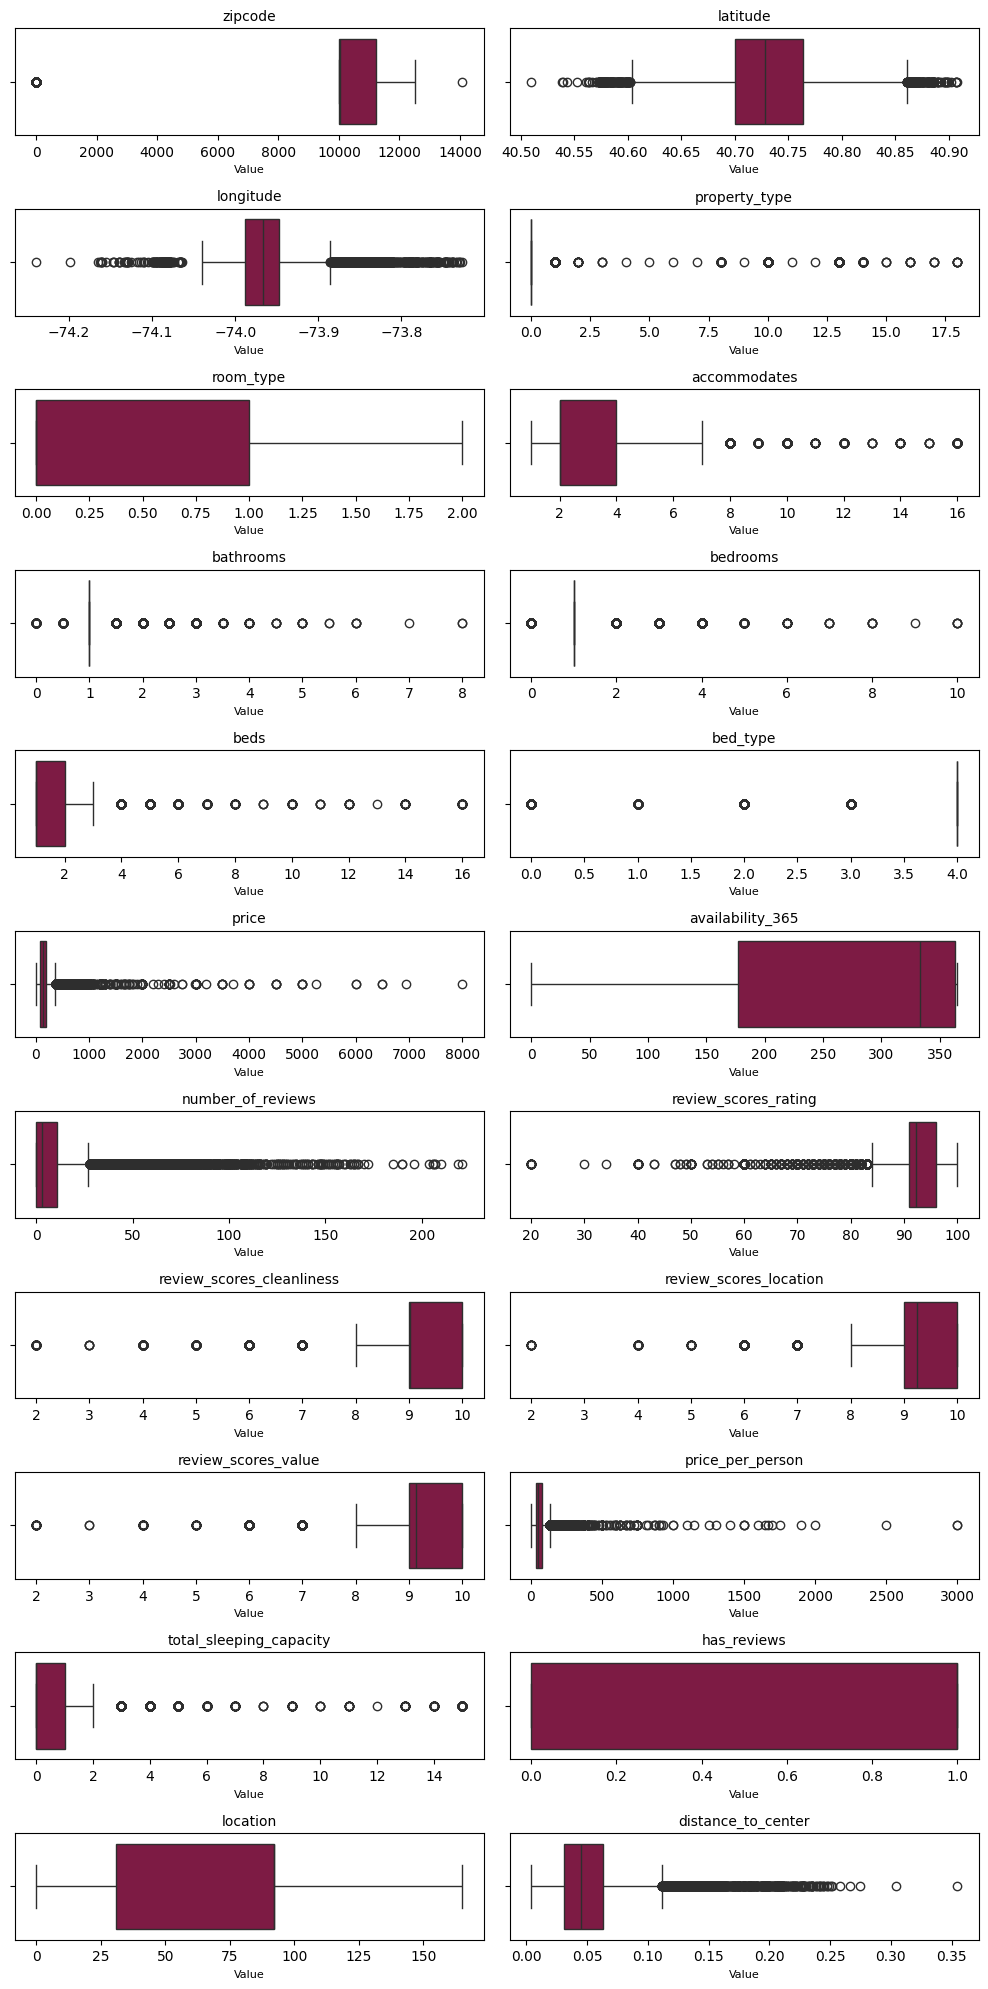

In [27]:
# Visualize outliers using box plots
plt.figure(figsize=(10, 20))
for i, column in enumerate(airbnb_data.columns, 1):
    plt.subplot(11, 2, i)
    sns.boxplot(x = airbnb_data[column], color = '#8D0B41')
    plt.title(f'{column}', fontsize=10)
    plt.xlabel('Value', fontsize=8)
plt.tight_layout()
plt.show()

In [28]:
# Identify outliers using IQR method
outliers = {}
for column in airbnb_data.columns:
    Q1 = airbnb_data[column].quantile(0.25)
    Q3 = airbnb_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = ((airbnb_data[column] < lower_bound) | (airbnb_data[column] > upper_bound)).sum()

outliers

{'zipcode': 169,
 'latitude': 367,
 'longitude': 796,
 'property_type': 2483,
 'room_type': 0,
 'accommodates': 678,
 'bathrooms': 3502,
 'bedrooms': 6897,
 'beds': 1144,
 'bed_type': 1117,
 'price': 1431,
 'availability_365': 0,
 'number_of_reviews': 2936,
 'review_scores_rating': 2410,
 'review_scores_cleanliness': 1642,
 'review_scores_location': 889,
 'review_scores_value': 699,
 'price_per_person': 1262,
 'total_sleeping_capacity': 1242,
 'has_reviews': 0,
 'location': 0,
 'distance_to_center': 1398}

In [29]:
outliers_cols = airbnb_data.drop(['location', 'has_reviews', 'room_type', 'availability_365'], axis = 1)

In [30]:
# Handling outliers by capping them to the lower and upper bounds
for column in outliers_cols.columns:
    Q1 = airbnb_data[column].quantile(0.25)
    Q3 = airbnb_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    airbnb_data[column] = np.where(airbnb_data[column] < lower_bound, lower_bound, airbnb_data[column])
    airbnb_data[column] = np.where(airbnb_data[column] > upper_bound, upper_bound, airbnb_data[column])

# Verifying if outliers are handled
outliers_after_handling = {}
for column in outliers_cols.columns:
    Q1 = airbnb_data[column].quantile(0.25)
    Q3 = airbnb_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_after_handling[column] = ((airbnb_data[column] < lower_bound) | (airbnb_data[column] > upper_bound)).sum()

outliers_after_handling

{'zipcode': 0,
 'latitude': 0,
 'longitude': 0,
 'property_type': 0,
 'accommodates': 0,
 'bathrooms': 0,
 'bedrooms': 0,
 'beds': 0,
 'bed_type': 0,
 'price': 0,
 'number_of_reviews': 0,
 'review_scores_rating': 0,
 'review_scores_cleanliness': 0,
 'review_scores_location': 0,
 'review_scores_value': 0,
 'price_per_person': 0,
 'total_sleeping_capacity': 0,
 'distance_to_center': 0}

## 3. Model Building

### 3.1 Data Splitting and Scaling

In [31]:
# Split features and target
X = airbnb_data.drop(['price'], axis = 1)
y = airbnb_data['price']

In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
X_train.shape, y_train.shape

((21913, 21), (21913,))

In [34]:
X_test.shape, y_test.shape

((5479, 21), (5479,))

#### 3.1.1 Scaling The Dataset

In [35]:
# Scale features
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

### 3.2 Linear Regression with Regularization

#### 3.2.1 Model Training

In [36]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

LinearRegression()

#### 3.2.2 Model Predictions

In [37]:
# Make predictions
train_predictions  = linear_regressor.predict(X_train_scaled)
test_predictions  = linear_regressor.predict(X_test_scaled)

#### 3.2.3 Model Evaluation

In [38]:
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
train_rmse

30.68398694209543

In [39]:
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_rmse

32.26101397632411

In [40]:
# Calculate R-squared scores
train_r2_score = round(linear_regressor.score(X_train_scaled, y_train)*100, 2)
train_r2_score

87.26

In [41]:
test_r2_score = round(linear_regressor.score(X_test_scaled, y_test)*100, 2)
test_r2_score

86.16

#### 3.2.4 Model Performance Analysis


The Linear Regression model shows:

1. RMSE Analysis:
   - Training RMSE: 30.68
   - Testing RMSE: 32.26
   - The similar RMSE values indicate consistent performance across training and test sets
   - Average prediction error is around 31-32

2. R² Score Analysis:
   - Training R²: 87.26%
   - Testing R²: 86.16%
   - Model explains about 87% of variance in training data
   - Small difference between training and test R² (1.1%) suggests good generalization
   - No significant overfitting present

3. Model Characteristics:
   - Shows good predictive performance
   - Demonstrates stability between training and test sets
   - Indicates linear assumptions might be appropriate for this data


#### 3.2.5 Lasso Regression with RandomizedSearchCV

In [42]:
lasso_param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
lasso_model = Lasso()
lasso_random_search = RandomizedSearchCV(
    lasso_model, 
    lasso_param_grid, 
    n_iter=10, 
    cv=5
)

In [43]:
# Fit Lasso regression model using RandomizedSearchCV
lasso_random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=Lasso(),
                   param_distributions={'alpha': [0.1, 1.0, 10.0, 100.0]})

In [44]:
# Get search results
lasso_cv_results = lasso_random_search.cv_results_

In [45]:
# Print results for each parameter combination
for i in range(len(lasso_cv_results["params"])):
    print(f"Parameters: {lasso_cv_results['params'][i]} "
          f"Mean score: {lasso_cv_results['mean_test_score'][i]} "
          f"Rank: {lasso_cv_results['rank_test_score'][i]}")

Parameters: {'alpha': 0.1} Mean score: 0.8721441378472047 Rank: 1
Parameters: {'alpha': 1.0} Mean score: 0.8708272688053802 Rank: 2
Parameters: {'alpha': 10.0} Mean score: 0.8302461870005379 Rank: 3
Parameters: {'alpha': 100.0} Mean score: -0.000132268553289272 Rank: 4


In [46]:
# Get best Lasso model
best_lasso_model = lasso_random_search.best_estimator_
best_lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [47]:
# Calculate Lasso performance metrics
lasso_train_accuracy = round(best_lasso_model.score(X_train_scaled, y_train)*100, 2)
lasso_test_accuracy = round(best_lasso_model.score(X_test_scaled, y_test)*100, 2)

lasso_train_accuracy, lasso_test_accuracy

(87.25, 86.16)

#### 3.2.6 Ridge Regression with GridSearchCV

In [48]:
ridge_param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_model = Ridge()
ridge_grid_search = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]})

In [49]:
# Get Ridge search results
ridge_cv_results = ridge_grid_search.cv_results_

In [50]:
# Print results for each parameter combination
for i in range(len(ridge_cv_results["params"])):
    print(f"Parameters: {ridge_cv_results['params'][i]} "
          f"Mean score: {ridge_cv_results['mean_test_score'][i]} "
          f"Rank: {ridge_cv_results['rank_test_score'][i]}")

Parameters: {'alpha': 0.1} Mean score: 0.8721624881038352 Rank: 3
Parameters: {'alpha': 1.0} Mean score: 0.8721626008401142 Rank: 2
Parameters: {'alpha': 10.0} Mean score: 0.8721626994213881 Rank: 1
Parameters: {'alpha': 100.0} Mean score: 0.8720676691109619 Rank: 4


In [51]:
# Get best Ridge model
best_ridge_model = ridge_grid_search.best_estimator_
best_ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=10.0)

In [52]:
# Calculate Ridge performance metrics
ridge_train_accuracy = round(best_ridge_model.score(X_train_scaled, y_train)*100, 2)
ridge_test_accuracy = round(best_ridge_model.score(X_test_scaled, y_test)*100, 2)

ridge_train_accuracy, ridge_test_accuracy

(87.26, 86.16)

---

### 3.3 Random Forest

In [53]:
# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True],
    'oob_score': [True]
}

In [54]:
# Initialize base model
rf_base = RandomForestRegressor(random_state=42)

In [55]:
# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

In [56]:
# Time the fitting process
search_start_time = dt.datetime.now()
rf_random.fit(X_train_scaled, y_train)
search_end_time = dt.datetime.now()

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [57]:
time_elapsed = (search_end_time - search_start_time).total_seconds()
time_elapsed_minutes = time_elapsed / 60
print(f"Time elapsed: {time_elapsed_minutes:.2f} minutes")

Time elapsed: 35.15 minutes


In [58]:
# Get best model
best_rf_model = rf_random.best_estimator_

In [59]:
#Print best parameters
print("\nBest Parameters Found:")
for param, value in rf_random.best_params_.items():
    print(f"{param}: {value}")


Best Parameters Found:
oob_score: True
n_estimators: 500
min_samples_split: 2
min_samples_leaf: 1
max_features: sqrt
max_depth: None
bootstrap: True


#### 3.3.1 Model Predictions

In [85]:
# Make predictions
train_predictions = best_rf_model.predict(X_train_scaled)
test_predictions = best_rf_model.predict(X_test_scaled)

#### 3.3.2 Model Evaluation

In [61]:
# Calculate performance metrics
oob_score = best_rf_model.oob_score_
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print metrics
print("\nModel Performance Metrics:")
print(f"Out-of-Bag Score: {oob_score:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")


Model Performance Metrics:
Out-of-Bag Score: 0.9488
Training RMSE: 7.1666
Test RMSE: 19.5829
Training R²: 0.9930
Test R²: 0.9490


In [62]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Print feature importance
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                      feature  importance
16           price_per_person    0.314590
4                   room_type    0.168955
5                accommodates    0.165794
2                   longitude    0.068994
0                     zipcode    0.045769
17    total_sleeping_capacity    0.043849
8                        beds    0.042090
20         distance_to_center    0.040480
1                    latitude    0.033241
10           availability_365    0.020850
19                   location    0.011619
11          number_of_reviews    0.011275
12       review_scores_rating    0.009662
14     review_scores_location    0.009486
13  review_scores_cleanliness    0.005709
15        review_scores_value    0.004463
18                has_reviews    0.003174
7                    bedrooms    0.000000
9                    bed_type    0.000000
6                   bathrooms    0.000000
3               property_type    0.000000


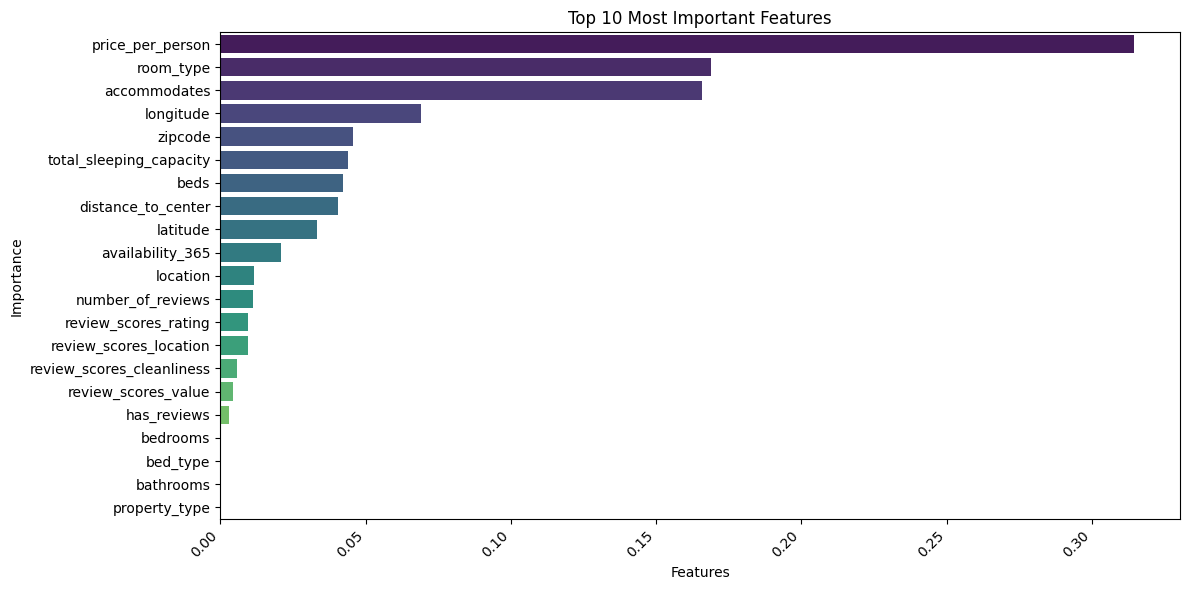

In [63]:
# Plot feature importance (top 10 features)
plt.figure(figsize=(12, 6))
sns.barplot(
    y = 'feature'[:10],
    x = 'importance'[:10],
    data = feature_importance,
    palette = 'viridis'
)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Important Features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

#### 3.3.3 Random Forest Model Performance Analysis

1. Metrics Summary
- Out-of-Bag (OOB) Score:
- Measures the model's generalization performance.

  - OOB Score: 0.9488 (94.88%)

  - Training Metrics:

    - R² Score: 0.9930 (99.30%)
    - Indicates excellent fit on the training data.
    - RMSE: 7.1666
    - Shows the average error magnitude for predictions on the training set.

  - Test Metrics:

    - R² Score: 0.9490 (94.90%)
    - Suggests strong performance on unseen data but slightly lower than the training score, indicating a minor risk of overfitting.
    - RMSE: 19.5829
    - Demonstrates the average prediction error on the test set.


2. **Feature Importance**
   
The top features contributing to the model's predictions are:

- price_per_person: 31.46%
- room_type: 16.89%
- accommodates: 16.57%
- longitude: 6.90%
- zipcode: 4.57%
Features like bathrooms, bedrooms, and property_type were deemed unimportant, as their importance scores were 0.

3. **Insights**
   
Strengths:

- High training and test R² scores show that the model captures the data's patterns effectively.
- The OOB score confirms the model's robustness against overfitting.
- Feature importance highlights intuitive features like price_per_person and room_type as significant.

Weaknesses:

- The gap between training and test RMSE suggests slight overfitting.
- Some features (e.g., bathrooms, bedrooms) are not contributing, which might indicate redundancy in the dataset.

---

### 3.4 XGBoost

In [64]:
xgb = XGBRegressor(n_estimators = 100, max_depth =  3, learning_rate = 0.1, random_state = 42)
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [65]:
xgb_y_train_pred = xgb.predict(X_train_scaled)
xgb_y_test_pred = xgb.predict(X_test_scaled)

In [66]:
train_score_xgb = r2_score(y_train, xgb_y_train_pred)
test_score_xgb = r2_score(y_test, xgb_y_test_pred)

#### 3.4.1 Model Evaluation

In [67]:
print(f'Training R2 Score: {(train_score_xgb): .2f}')

Training R2 Score:  0.98


In [68]:
print(f'Test R2 Score: {(test_score_xgb): .2f}')

Test R2 Score:  0.98


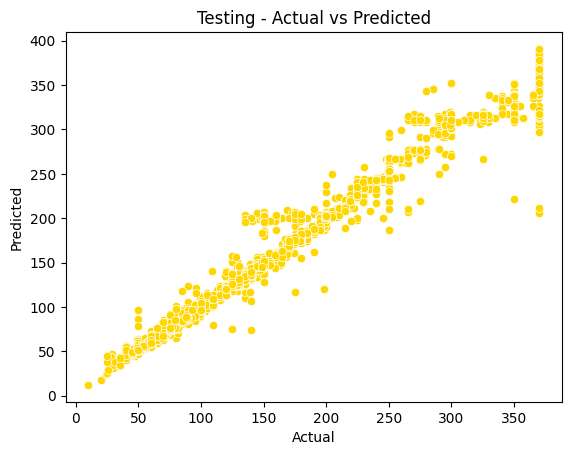

In [69]:
sns.scatterplot(x = y_test, y = xgb_y_test_pred, color = 'gold')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Testing - Actual vs Predicted')
plt.show()

In [70]:
imp_features_xgb = xgb.feature_importances_
imp_features_xgb

xgb_importance_df = pd.DataFrame({
    'feature': X.columns,
    'Importance': imp_features_xgb
})
xgb_importance_df.sort_values(by = 'Importance', ascending = False, inplace = True)
xgb_importance_df

,feature,Importance
4,room_type,0.334465
5,accommodates,0.266370
16,price_per_person,0.265774
2,longitude,0.102772
11,number_of_reviews,0.009375
17,total_sleeping_capacity,0.006479
8,beds,0.005574
1,latitude,0.004353
10,availability_365,0.002058
19,location,0.001271


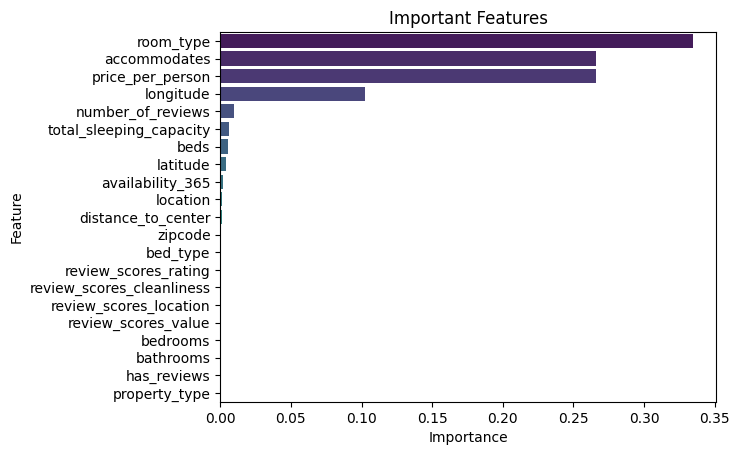

In [71]:
sns.barplot(y = 'feature', x = 'Importance', data = xgb_importance_df, palette = 'viridis')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.title('Important Features')
plt.show()

In [72]:
# Define parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'n_estimators': [100, 200, 300, 500],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}


In [73]:
# Initialize base XGBoost model
xgb_base = XGBRegressor(random_state=42)

In [74]:
# Initialize RandomizedSearchCV
xgb_random = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

In [75]:
# Time the fitting process
search_start_time = dt.datetime.now()
print("Finding best hyperparameters...")
xgb_random.fit(X_train_scaled, y_train)
search_end_time = dt.datetime.now()

Finding best hyperparameters...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [76]:
time_elapsed = (search_end_time - search_start_time).total_seconds()
time_elapsed_minutes = time_elapsed / 60
print(f"Time elapsed: {time_elapsed_minutes:.2f} minutes")

Time elapsed: 8.72 minutes


In [77]:
# Get best model
best_xgb_model = xgb_random.best_estimator_

In [78]:
# Print best parameters
print("\nBest Parameters Found:")
for param, value in xgb_random.best_params_.items():
    print(f"{param}: {value}")


Best Parameters Found:
subsample: 1.0
n_estimators: 500
min_child_weight: 5
max_depth: 5
learning_rate: 0.01
gamma: 0.2
colsample_bytree: 1.0


In [80]:
# Make predictions
train_predictions = best_xgb_model.predict(X_train_scaled)
test_predictions = best_xgb_model.predict(X_test_scaled)

#### 3.4.2 Model Evaluation After Tuning

In [81]:
# Calculate performance metrics
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print metrics
print("\nModel Performance Metrics:")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")


Model Performance Metrics:
Training RMSE: 10.2675
Test RMSE: 9.9387
Training R²: 0.9857
Test R²: 0.9869


In [82]:
# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_xgb_model.feature_importances_
})

# Sort features by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Print feature importance
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))



Top 10 Most Important Features:
                      feature  importance
4                   room_type    0.600705
16           price_per_person    0.177736
5                accommodates    0.165441
17    total_sleeping_capacity    0.010114
11          number_of_reviews    0.008190
8                        beds    0.006197
15        review_scores_value    0.004908
13  review_scores_cleanliness    0.004728
10           availability_365    0.004052
20         distance_to_center    0.003498


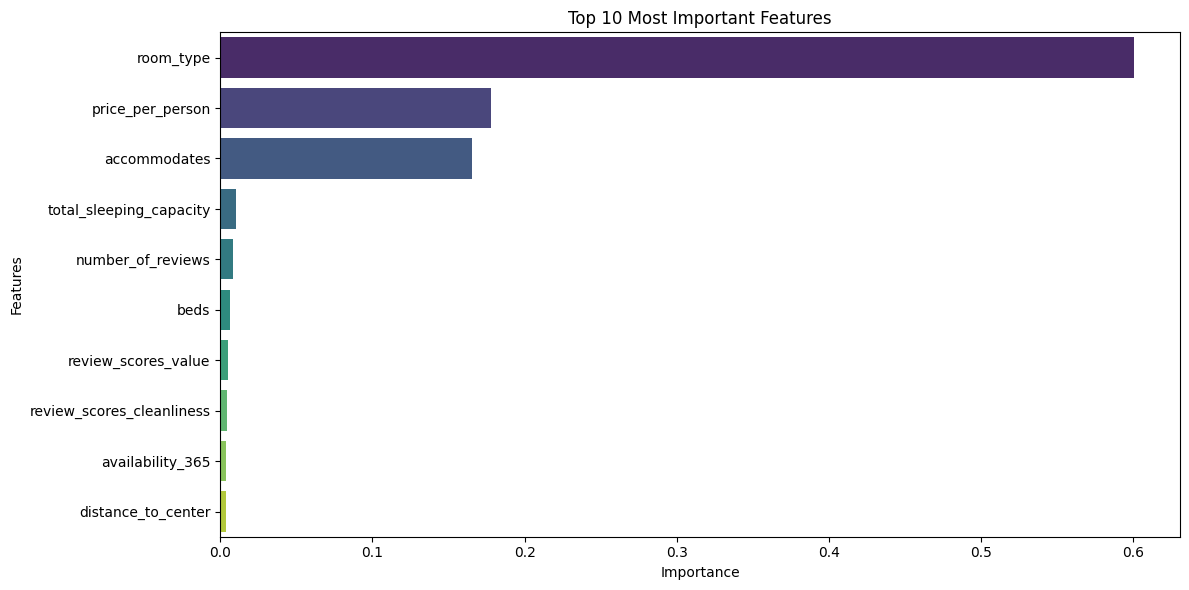

In [83]:
# Plot 1: Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(
    data=feature_importance.head(10),
    y='feature',
    x='importance',
    palette='viridis'
)
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

### 3.4.3 XGBoost Model Performance Analysis

1. **Metrics Summary**

- Training Metrics:

    - R² Score: 0.9800 (98.00%)
        - Indicates a strong fit on the training data but slightly lower than Random Forest.
    - RMSE: 10.2675
        -  Shows the model's error on training data, slightly higher than Random Forest.

- Test Metrics:
    
    - R² Score: 0.9800 (98.00%)
        - Demonstrates excellent performance on unseen data and is on par with the training score, showing no signs of overfitting.
    - RMSE: 9.9387
        - Indicates a low prediction error on the test set, confirming strong generalization. 

2. **Feature Importance**
The top features contributing to the model's predictions are:

    - room_type: 33.45%
    - accommodates: 26.63%
    - price_per_person: 26.57%
   - longitude: 10.28%
     
        Features like bedrooms, bathrooms, and property_type also had no contribution (0 importance).

3. **Insights**
   
    Strengths:
    
    - Consistent training and test R² scores indicate a well-generalized model.
    - Strong performance on key features like room_type and accommodates, showing alignment with the domain.
    - Handles large datasets and high-dimensional data efficiently.
    
    Weaknesses:
    
    - Slightly lower interpretability compared to Random Forest.
    - Requires careful hyperparameter tuning to avoid overfitting or underfitting.


### **Evaluation**

#### a. Comparison of Model Performance
The performance of the models was evaluated using training, validation, and test datasets. The key metric for comparison is the R² score, which represents the proportion of variance explained by the model. Additionally, for Random Forest and XGBoost, feature importance was analyzed to understand key predictors.



|       Model       |Training R²  | Test R²    |                      Key Insights                                        |
|-------------------|-------------|------------|--------------------------------------------------------------------------|
| Linear Regression	|    87.26%	  |   86.16%   |Baseline model with good performance.                                     |
| Lasso Regression	|    87.25%	  |   86.16%   |Similar to Linear Regression; effective in reducing feature coefficients. |
| Ridge Regression	|    87.26%	  |   86.16%   |Matches Linear Regression; stable performance across parameters.          |
| Random Forest	    |    99.30%	  |   94.90%   |Excellent performance; high training score suggests overfitting.          |
| XGBoost	     	|    98.00%	  |    98.00%  |Best performance overall; balanced between training and test datasets.    |


#### b. Comments on Insights and Recommendations

**Insights**:

- `Linear`, `Lasso`, and `Ridge Regression`: These models show consistent performance, with similar R² scores across training and test datasets. This indicates they are well-suited for the given data without overfitting.

- `Random Forest`: The high training R² (99.30%) compared to test R² (94.90%) suggests slight overfitting. However, the model effectively identifies important features like price_per_person, room_type, and accommodates.

- `XGBoost`: Achieved the highest test R² (98.00%), demonstrating robust generalization and suitability for this dataset.

  
**Feature Importance**:

- Random Forest identified price_per_person, room_type, and accommodates as the most important features.
- XGBoost highlighted room_type, accommodates, and price_per_person as key contributors to predictions.

**Recommendations**:

- For production deployment, consider XGBoost due to its superior performance and ability to handle complex data patterns effectively.
- Random Forest can serve as a backup model, especially if interpretability of feature importance is a priority.
- Linear models (Linear, Lasso, and Ridge Regression) are suitable for scenarios requiring simplicity and explainability, but they may not capture non-linear relationships as effectively as ensemble methods.